In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
num_classes = 10

class LeNet5(nn.Module):
  def __init__(self, num_classes):
    super(LeNet5, self).__init__()

    self.conv1 = nn.Conv2d(
        in_channels = 1,
        out_channels = 6,
        kernel_size = 5
    )

    self.pool1 = nn.MaxPool2d(
        kernel_size = 2,
        stride = 2
    )

    self.conv2 = nn.Conv2d(
        in_channels = 6,
        out_channels = 16,
        kernel_size = 5
    )

    self.pool2 = nn.MaxPool2d(
        kernel_size = 2,
        stride = 2
    )

    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)

    self.fc3 = nn.Linear(84, num_classes)

  def forward(self, x):
    x = self.pool1(F.relu(self.conv1(x)))
    x = self.pool2(F.relu(self.conv2(x)))

    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))

    x = F.log_softmax(self.fc3(x), dim = 1)
    return x

In [3]:
import torchvision
import torchvision.transforms as transforms

In [4]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

train_dataset = torchvision.datasets.MNIST(
    root = './data',
    train = True,
    transform = transform,
    download = True
)

test_dataset = torchvision.datasets.MNIST(
    root = './data',
    train = False,
    transform = transform,
    download = True
)

train_loader = torch.utils.data.DataLoader(
    dataset = train_dataset,
    batch_size = 64,
    shuffle = True
)

test_loader = torch.utils.data.DataLoader(
    dataset = test_dataset,
    batch_size = 64,
    shuffle = False
)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 14.7MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 488kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.40MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.27MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
import torch.optim as optim

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = LeNet5(num_classes).to(device)
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [11]:
def train(model, train_loader, criterion, optimizer, num_epochs):
  training_losses = []

  for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for i, (inputs, labels) in enumerate(train_loader):

      inputs, labels = inputs.to(device), labels.to(device)

      optimizer.zero_grad()

      outputs = model(inputs)
      loss = criterion(outputs, labels)

      loss.backward()
      optimizer.step()

      running_loss += loss.item() * inputs.size(0)
      optimizer.step()

    avg_loss = running_loss / len(train_loader)
    training_losses.append(avg_loss)

    print(f"epoch: {epoch + 1}, loss: {avg_loss:.4f}")

  return training_losses

In [12]:
num_epochs = 45

training_losses = train(model, train_loader, criterion, optimizer, num_epochs)

epoch: 1, loss: 0.4646
epoch: 2, loss: 0.4688
epoch: 3, loss: 0.6508
epoch: 4, loss: 0.3858
epoch: 5, loss: 0.5131
epoch: 6, loss: 0.5437
epoch: 7, loss: 0.3081
epoch: 8, loss: 0.5010
epoch: 9, loss: 0.6045
epoch: 10, loss: 0.2846
epoch: 11, loss: 0.4939
epoch: 12, loss: 0.4164
epoch: 13, loss: 0.3510
epoch: 14, loss: 0.5297
epoch: 15, loss: 0.4421
epoch: 16, loss: 0.7674
epoch: 17, loss: 0.4677
epoch: 18, loss: 0.3933
epoch: 19, loss: 0.5149
epoch: 20, loss: 0.2105
epoch: 21, loss: 0.4976
epoch: 22, loss: 0.6173
epoch: 23, loss: 0.5843
epoch: 24, loss: 0.4058
epoch: 25, loss: 0.3742
epoch: 26, loss: 0.2821
epoch: 27, loss: 0.5904
epoch: 28, loss: 0.7200
epoch: 29, loss: 0.3182
epoch: 30, loss: 0.6152
epoch: 31, loss: 0.3270
epoch: 32, loss: 0.7865
epoch: 33, loss: 0.3723
epoch: 34, loss: 0.8687
epoch: 35, loss: 0.4269
epoch: 36, loss: 0.5011
epoch: 37, loss: 0.5198
epoch: 38, loss: 0.4186
epoch: 39, loss: 0.5137
epoch: 40, loss: 0.4492
epoch: 41, loss: 0.4782
epoch: 42, loss: 0.6160
e

In [14]:
training_losses

[0.46462601211014,
 0.4688276819500106,
 0.6508384165166712,
 0.38583399823326436,
 0.5131161000820934,
 0.5436936661767091,
 0.30812813886311846,
 0.5010463282290917,
 0.6044821051013124,
 0.284636645995568,
 0.49389790098429076,
 0.4164323523808028,
 0.3510230073857451,
 0.5297393777201489,
 0.44212308975319325,
 0.7674045870527554,
 0.46772033266203494,
 0.3933477205549793,
 0.5148831068737559,
 0.2104836697767554,
 0.4976011770882491,
 0.6172807985288501,
 0.5842625428261818,
 0.40576617010067695,
 0.374192196833346,
 0.28205468465231487,
 0.5903599913575193,
 0.7200394507018897,
 0.3181625589167874,
 0.6151586305054897,
 0.3269952172480367,
 0.7865150933373701,
 0.37234396157639166,
 0.8686661299472803,
 0.42690511438319767,
 0.5010526254257934,
 0.5197575819642692,
 0.41860315204052023,
 0.5136918238167045,
 0.4492420530506668,
 0.4782061625954513,
 0.6160108804633713,
 0.4774048068406021,
 0.6402754694125953,
 0.2643672906664178]

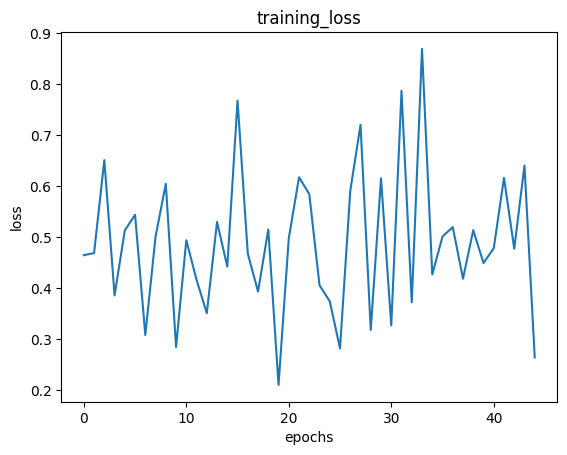

In [15]:
import matplotlib.pyplot as plt

plt.plot(training_losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('training_loss')
plt.show()

In [17]:
def predict(model, test_loader):
  model.eval()
  correct = 0
  total = 0

  with torch.no_grad():
    for inputs, labels in test_loader:
      inputs, labels = inputs.to(device), labels.to(device)

      outputs = model(inputs)

      _, predicted = torch.max(outputs.data, 1)

      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"accuracy: {accuracy:.2f}")

In [18]:
predict(model, test_loader)

accuracy: 99.07
